# Customer Market Segmentation 
<div class="alert alert-info">For this case study, I will make the assumption that I work at a bank as a Data Scientist, and I have been provided with the opportunity to work on a **customer market segmentation project**. This strategy is helpful for the marketing team to launch a **targeted marketing campaign** which is tailored to a specific customer base. 

The dataset is in a <mark>CSV format</mark>, and it comprises of extensive data like balance, balance frequency, purchases, credit limit, etc., collected over the past 6 months. The goal here is to divide the customers into **atleast 3 different categories** based on their past behaviour and activity in order to maximize the maketing campaign **conversion rate** (percentage of customers who have completed the desired action proposed in the campaign). 

There are typically 4 distinct groups that customers can be segmented into- 
* **Transactors** - Customers who pay the least amount of interest charges and are careful with their money
* **Revolvers** - Customers who use their credit card as a loan. This is extremely lucrative for the bank since they pay more than 20% interest
* **VIP/PRIME** - Customers with high credit limit and high percentage of full payment; the bank could lure them to try and increase their credit limit and spending habit
* **New Customers** - New customers with low tenure who can be targeted to enroll in other bank services
    
<img src = "customer seg pie chart.png" width=500>

Let me first download the required libraries that could be useful in the analysis.</div>

# Importing Files and Libraries

In [2]:
# Import libraries
import numpy as np   #numerical analysis
import pandas as pd   #dataframe manipulation
import seaborn as sns   #visualization
import matplotlib.pyplot as plt   #visualization
from sklearn.preprocessing import StandardScaler, normalize   #to scale th data 
from sklearn.cluster import KMeans   
from sklearn.decomposition import PCA

In [3]:
# Import dataset
bank_df = pd.read_csv('marketing_data.csv')
bank_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<div class="alert alert-info">There are 8950 rows and 18 columns in the dataset. There seem to be no null values in most of the columns (except minimum payments and credit limit), and all the numerical datatypes are either integers or floats. This makes for accurate statistical calculations.</div>

In [5]:
bank_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**INSIGHTS**
* Average **bank balance** is ~1600, Minimum balance is 0, Maximum balance is ~19000 
* Average **purchases** is ~1000 and average **one off purchases** is ~600, while **installments purchases** is ~400
* Average **credit limit** is ~4500
* In general, **purchase frequency, one off purchase frequency, and purchase installments frequency** is quite low
* **Percentage of full payment** averages at 15%
* Average **tenure** is 11 years

In [6]:
# More analysis 
display(bank_df[bank_df['ONEOFF_PURCHASES'] == bank_df['ONEOFF_PURCHASES'].max()])
display(bank_df[bank_df['CASH_ADVANCE'] == bank_df['CASH_ADVANCE'].max()])

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<div class="alert alert-info">The customer with ID C10574 has the maximum one off purchase with 40761.25. C12226 has paid the maximum cash advance of 47137.2, with a frequency of 123 transactions, and no full payments done in the past. These are the kinds of customers that would generate maximum revenue for the bank as they do not engage in paying for anything in full, they have a high frequency of cash advance transactions and pay high amounts with super high interest rates (atleast 20%).</div>

# Data Visualization
I would like to visualize any null values in the dataset with the help of a heatmap.

<AxesSubplot:>

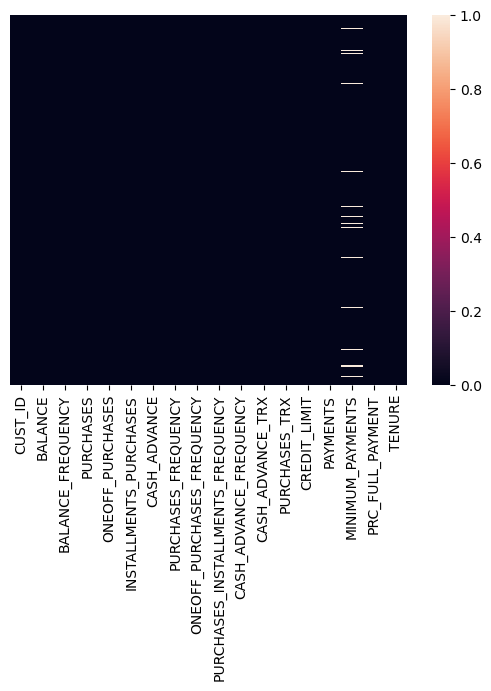

In [7]:
sns.heatmap(bank_df.isnull(), yticklabels= False)

<div class="alert alert-info">Minimum payments have a couple of null values. But, how many exactly?</div>

In [8]:
bank_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<div class="alert alert-info">There are 313 null values in minimum payments and 1 in credit limit. I will fill them out by imputing the respective mean values.</div>

In [9]:
bank_df = bank_df.fillna(bank_df['MINIMUM_PAYMENTS'].mean())
bank_df = bank_df.fillna(bank_df['CREDIT_LIMIT'].mean())
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
# check for duplicates 
bank_df.duplicated().sum()

0

<div class="alert alert-info">So, all the elements in the dataframe are unique, and there are no duplicates present.</div>

In [11]:
# Drop CUST_ID column
bank_df.drop('CUST_ID', axis=1, inplace=True) #dropping the entire column, and change the value of the df in memory
bank_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<div class="alert alert-info">Perfect. Next, I want to plot histograms to analyze the distributions.</div>

C:\Users\itxen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\itxen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\itxen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

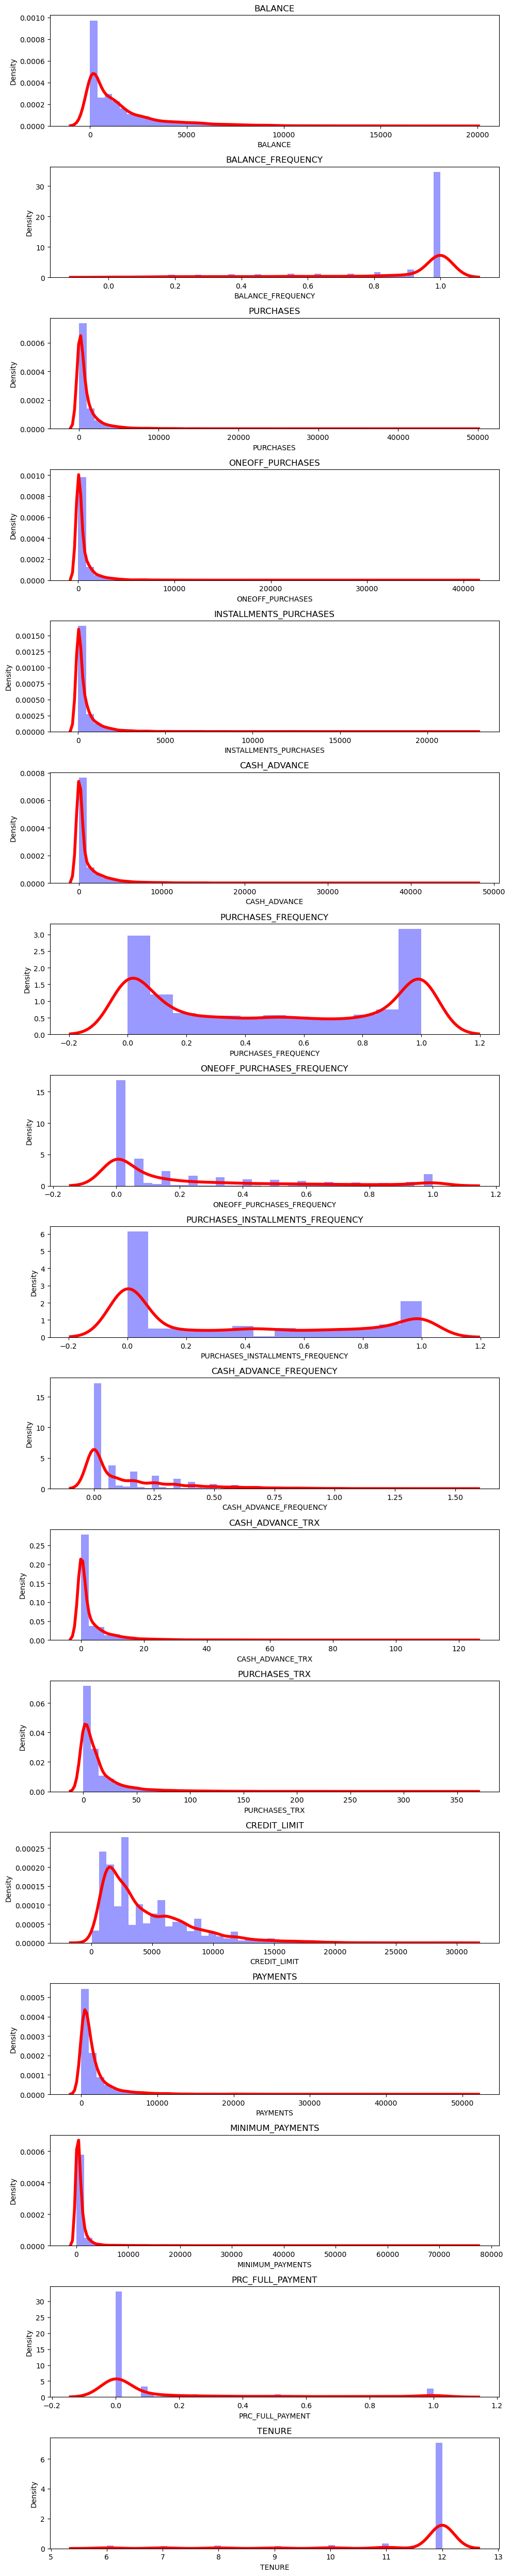

In [12]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable.

plt.figure(figsize=(10,50))
for i in range(len(bank_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.distplot(bank_df[bank_df.columns[i]], kde_kws={'color': 'r', 'lw': 4, 'label': 'Kde'}, hist_kws={'color': 'b'})
    plt.title(bank_df.columns[i])
    
plt.tight_layout()

**INSIGHTS**
* **Balance Frequency**: Most customers update their balances quite frequently, so it is mostly around 0.9 to 1
* **Purchase Frequency**: Seems like there are two distinct types of customers, one where the frequency is almost 0, and the other where the frequency is high at around 1
* **One off Purchase Frequency**: Most of them have a low one off purchase frequency
* **Cash Advance Frequency**: Low values at around 0
* **Percentage Full Payment**: Most of them do not pay in full. A very small number actually pay in full. That is interesting. 
* **Tenure**: Most of them have a 10-12 year tenure, and so they seem to be loyal customers to the bank

<AxesSubplot:>

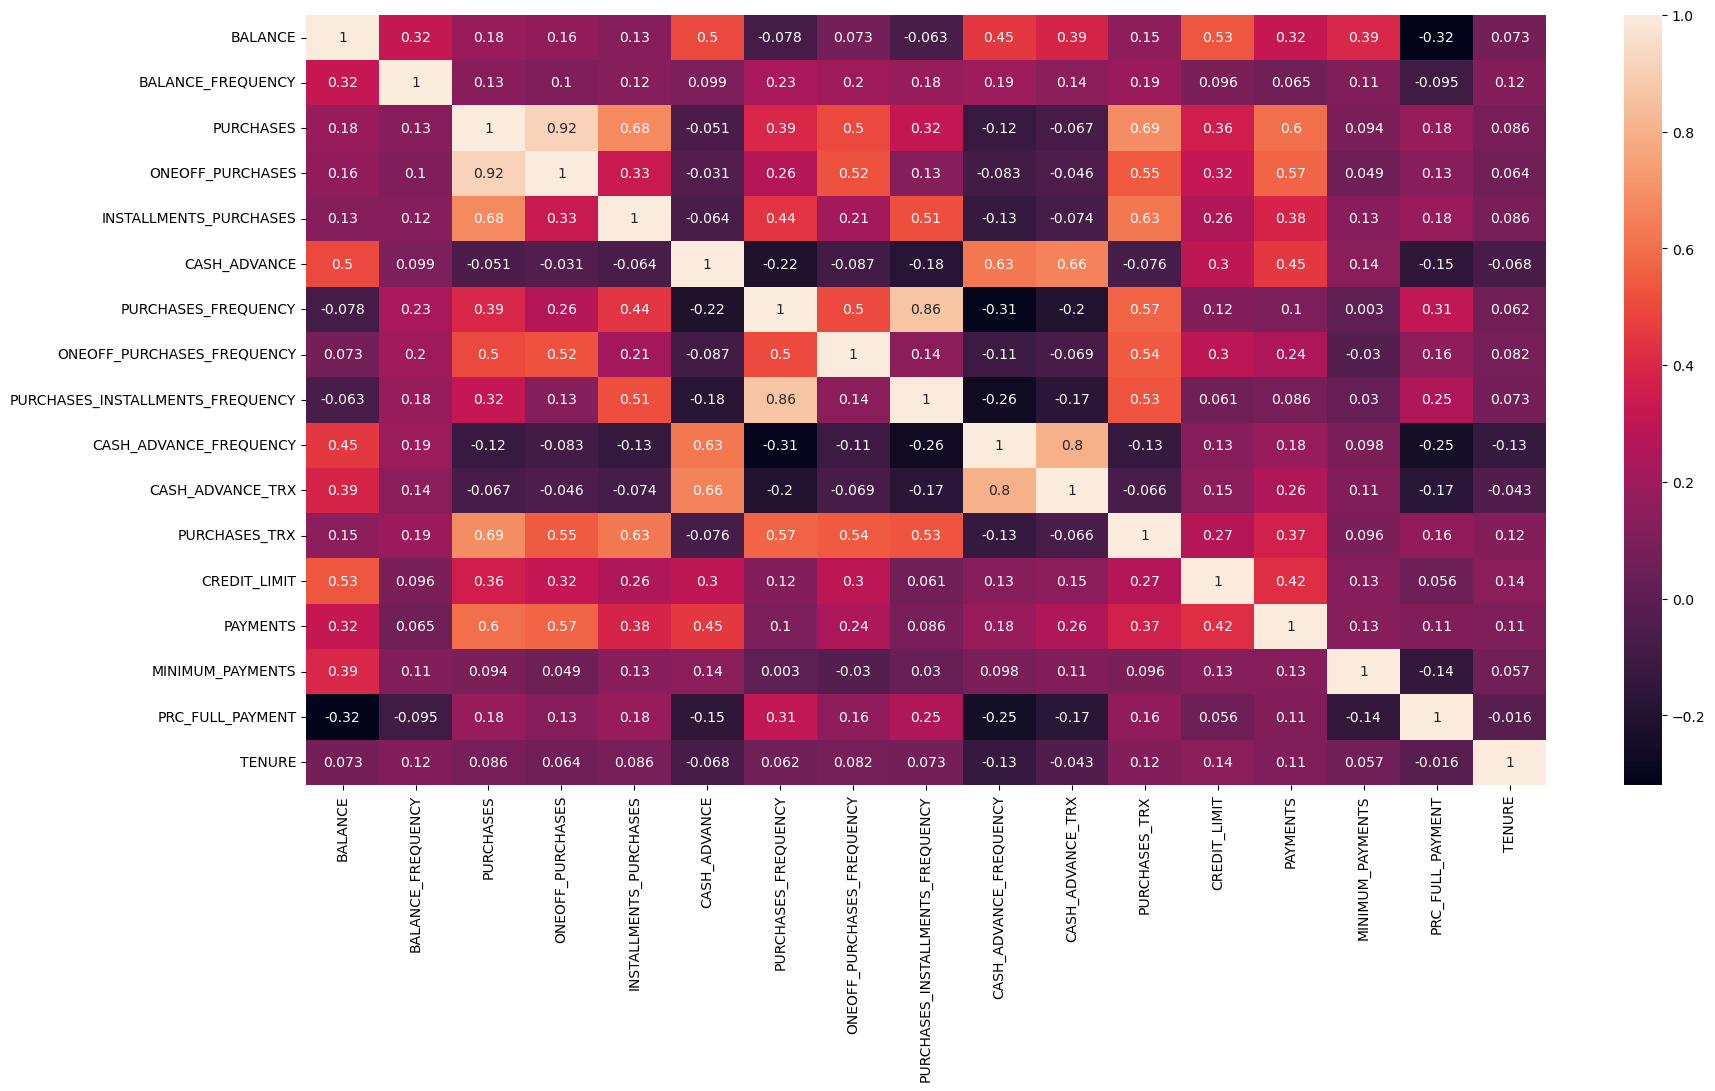

In [13]:
# Correlation Matrix
corr = bank_df.corr()
f, ax = plt.subplots(figsize=(20,10)) #else the plot is too crowded
sns.heatmap(corr,annot=True)

* Purchases has a high correlation with one off purchases, installment purchases, and purchases transactions. 
* Cash advance transactions and cash advance frequency seem to be highly correlated as well. 
* Purchase frequency and purchase installment frequency are also highly correlated. 

# KMeans Clustering - What is it?
* K-Means clustering is an **unsupervised machine learning algorithm** that works by some data points together. 
* Observations with similar attribute values are clubbed togther with the help of their **Euclidian distance**. 
* First, the number of clusters are chosen. Random K centroids are selected for each cluster. Each data point is assigned to the nearest centroid. A new centroid is calculated and data points are reassigned to the closest centroid. 
* The optimal number of clusters are selected using the **elbow method**. First, the **Within Cluster Sum of Squares (WCSS)** is calculated. The distance between each point and its centroid is squared and summed within each cluster and all these squares are summed up. 

$$WCSS={\sum}distance(P_{i},C_{1})^2 + {\sum} distance (P_{i},C_{2})^2 + {\sum} distance (P_{i}, C_{3})^2$$

When the K is small, the WCSS will be large. As K becomes higher, the WCSS gradually reduces because the distances between the points and the centroids reduce when many centroid are present. When you plot the WCSS vs K, a curve is made. To choose the optimal number of cluters, the **elbow** point is detected in the curve (the point where the curve starts becoming pretty much steady as it decreases further). 

## Applying the elbow method
<div class="alert alert-info">Before figuring out the optimal K value, the data has to be scaled.</div>

In [14]:
scaler = StandardScaler()  #create an object scaler
bank_df_scaled = scaler.fit_transform(bank_df)  #apply fit_transform method on object
bank_df_scaled.shape

(8950, 17)

<div class="alert alert-info">There are around 9000 samples and 17 columns. There has been no change made to the number of rows or columns. I notice that there is no target variable in the dataset; there are only features present. Hence, it is an unsupervised ML technique (no label).</div>

In [15]:
bank_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

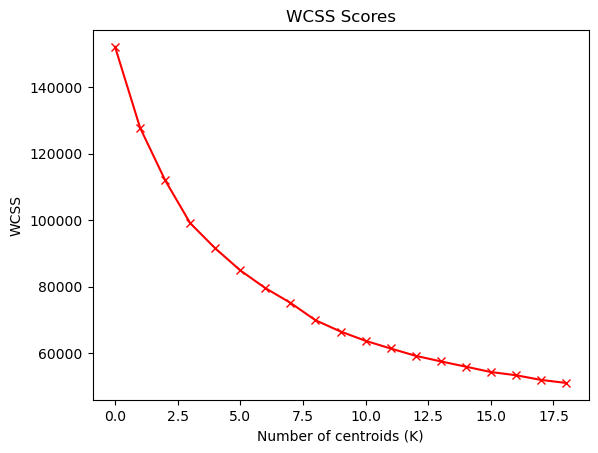

In [22]:
# Calculate WCSS
scores = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i) # n_clusters is a parameter in KMeans 
    kmeans.fit(bank_df_scaled)
    scores.append(kmeans.inertia_) #inertia_ is an attribute and is the sum of squared distances of the samples to their closest cluster center
plt.plot(scores, 'rx-')  #r stands for red and x- is the cross on each value
plt.title('WCSS Scores')
plt.xlabel('Number of centroids (K)')
plt.ylabel('WCSS')
plt.show()
    

<div class="alert alert-info">It seems clear that the elbow at around 7.5 to 10.0. So, the ideal number of clusters to choose for this project would be 7 or 8. I will go with 7 If we had chosen fewer features/columns from the dataset, K would be lower, at around 5 for 7 features and lower values for 6 and less than 6.</div>

# KMeans Method


In [24]:
kmeans = KMeans(7)  #create the kmeans object and specify k=7
kmeans.fit(bank_df_scaled)  #apply the fit method on the object and pass along the scaled data
labels = kmeans.labels_  #indicates the labels associated with each data point
display(kmeans.cluster_centers_)  #centroids for all the clusters
kmeans.cluster_centers_.shape  #gives the shape of the centroids for all the clusters

array([[ 1.43023770e+00,  4.19466592e-01,  6.91504796e+00,
         6.08303393e+00,  5.17226599e+00,  3.87781454e-02,
         1.09069901e+00,  1.87930303e+00,  1.04941338e+00,
        -2.49227098e-01, -3.81659717e-02,  4.64622756e+00,
         2.19836042e+00,  4.78370351e+00,  1.08094535e+00,
         8.24001160e-01,  3.34612991e-01],
       [-3.67555219e-01,  3.30562011e-01, -3.98402407e-02,
        -2.34949775e-01,  3.37266429e-01, -3.68098626e-01,
         9.80609294e-01, -3.57342939e-01,  1.17319957e+00,
        -4.77686758e-01, -3.62423869e-01,  1.73897496e-01,
        -2.78109186e-01, -2.21809553e-01, -1.57346411e-02,
         3.07237451e-01,  2.52156008e-01],
       [ 1.66619765e+00,  3.91958389e-01, -2.05031156e-01,
        -1.49680702e-01, -2.09888146e-01,  1.99231374e+00,
        -4.55932008e-01, -1.89722481e-01, -4.03469495e-01,
         1.90957521e+00,  1.92331225e+00, -2.41022074e-01,
         1.00830749e+00,  8.35937218e-01,  5.53056546e-01,
        -3.91010663e-01,  6.9

(7, 17)

In [25]:
# Create a dataframe that show the centroids for all data points
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns= [bank_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198360,4.783704,1.080945,0.824001,0.334613
1,-0.367555,0.330562,-0.039840,-0.234950,0.337266,-0.368099,0.980609,-0.357343,1.173200,-0.477687,-0.362424,0.173897,-0.278109,-0.221810,-0.015735,0.307237,0.252156
2,1.666198,0.391958,-0.205031,-0.149681,-0.209888,1.992314,-0.455932,-0.189722,-0.403469,1.909575,1.923312,-0.241022,1.008307,0.835937,0.553057,-0.391011,0.069481
3,0.126801,0.429730,0.939029,0.895888,0.574411,-0.309125,1.092770,1.872513,0.534806,-0.410394,-0.320751,1.196848,0.701744,0.385048,-0.057462,0.456446,0.307642
4,0.008483,0.403024,-0.343959,-0.225260,-0.399336,-0.103965,-0.810406,-0.336507,-0.752333,0.085171,-0.041412,-0.464661,-0.300655,-0.248877,-0.015617,-0.452870,0.272336
5,-0.701914,-2.135202,-0.307061,-0.230399,-0.302643,-0.322829,-0.547706,-0.428162,-0.441853,-0.521852,-0.376776,-0.416715,-0.172587,-0.202070,-0.257337,0.294319,0.198400
6,-0.334843,-0.343573,-0.284231,-0.208737,-0.288211,0.065686,-0.197106,-0.271926,-0.229662,0.304677,-0.001695,-0.385258,-0.559015,-0.390390,-0.209717,0.013756,-3.194665


<div class="alert alert-info">I want to make sense out of these numbers, and so I am going to scale them back using inverse transformation.</div>

In [26]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers, columns= [bank_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
1,799.439665,0.955578,918.085545,202.468866,716.053491,206.951098,0.883916,0.095855,0.830697,0.039554,0.775550,19.032274,3482.112568,1091.026929,827.537625,0.243576,11.854768
2,5032.524583,0.970122,565.152609,343.998063,221.268399,5156.846095,0.307363,0.145860,0.204088,0.517270,16.374020,8.718925,8162.883030,4153.100190,2153.081492,0.039351,11.610302
3,1828.399674,0.979070,3009.455142,2079.427650,930.500678,330.620880,0.928932,0.761065,0.576983,0.053020,1.059937,44.458991,7047.418985,2847.821449,730.293998,0.287217,11.929022
4,1582.130592,0.972743,268.331228,218.551879,49.953480,760.851635,0.165096,0.102071,0.065441,0.152188,2.966221,3.160099,3400.076237,1012.669689,827.811755,0.021258,11.881773
5,103.500064,0.371461,347.163889,210.022694,137.391027,301.884228,0.270530,0.074729,0.188834,0.030716,0.677609,4.351852,3866.068556,1148.172186,264.493843,0.239798,11.782828
6,867.527490,0.795881,395.941226,245.976624,150.442309,1116.616899,0.411243,0.121337,0.273164,0.196113,3.237261,5.133758,2460.006698,603.004456,375.470865,0.157738,7.242038


<div class="alert alert-info">The objective of this case study is to segment the customers into groups. I have 7 rows that represent the 7 centroids in the 7 clusters formed using k-means clustering. 

**Transactors**
These customers pay the least amount of interest charges.
The 6th group has customers with the lowest bank balance of 103.5, and the lowest cash advance of 137.39. Their % of full payment is around 24%. 

**Revolvers**
These customers use their credit card as a loan and is the most lucrative sector. The 3rd group belongs to the revolvers category. They have the highest bank balance (5032) and cash advance (5156), low purchase frequency (0.3), and high cash advance transactions (16) and low % of full payment (3%)

**VIP**
They have a high credit limit (12k) and the high % of full payment (39%). The 1st group belongs to this category. They are the targets to increase their credit limit and spending habits.

**New Customers**
These are customers with low tenure (7 years) and low balance (867). 7th group.  

I will now concatenate the cluster labels to the dataframe bank_df</div>

In [27]:
# Concatenate cluster labels to original dataframe 
bank_df_cluster = pd.concat([bank_df, pd.DataFrame({'cluster': labels})], axis=1)
bank_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


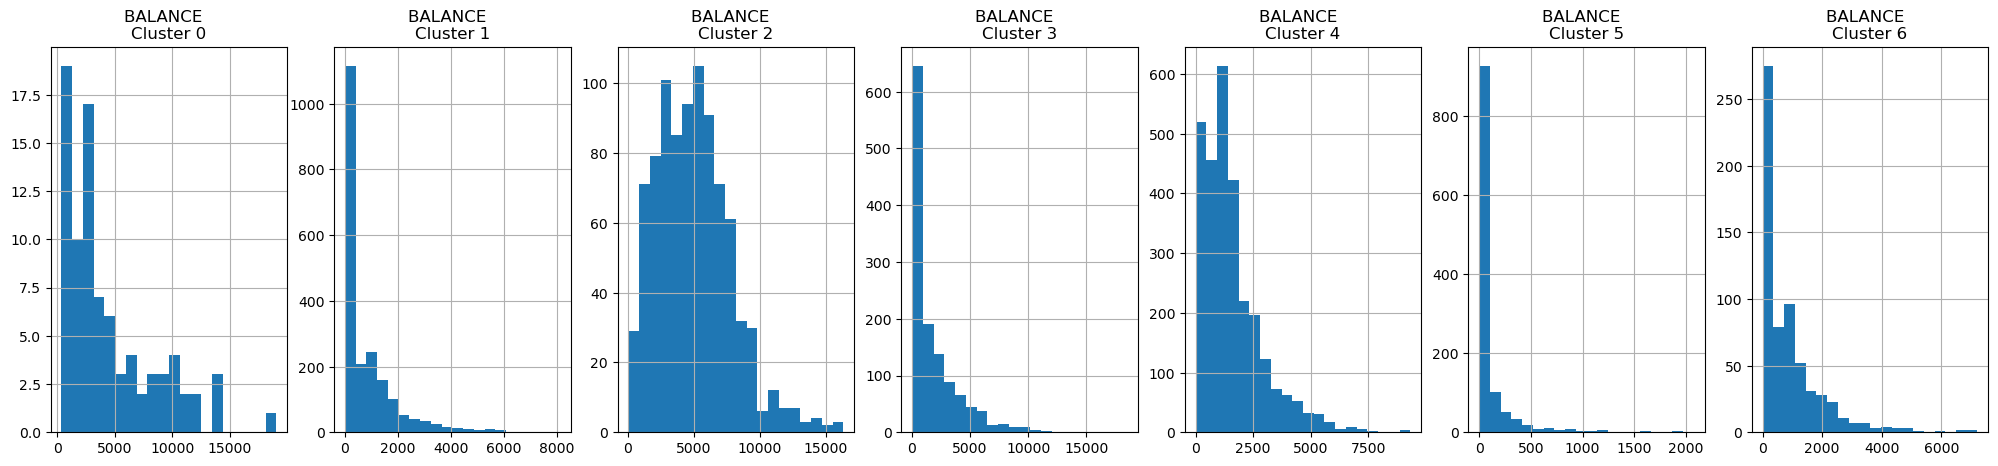

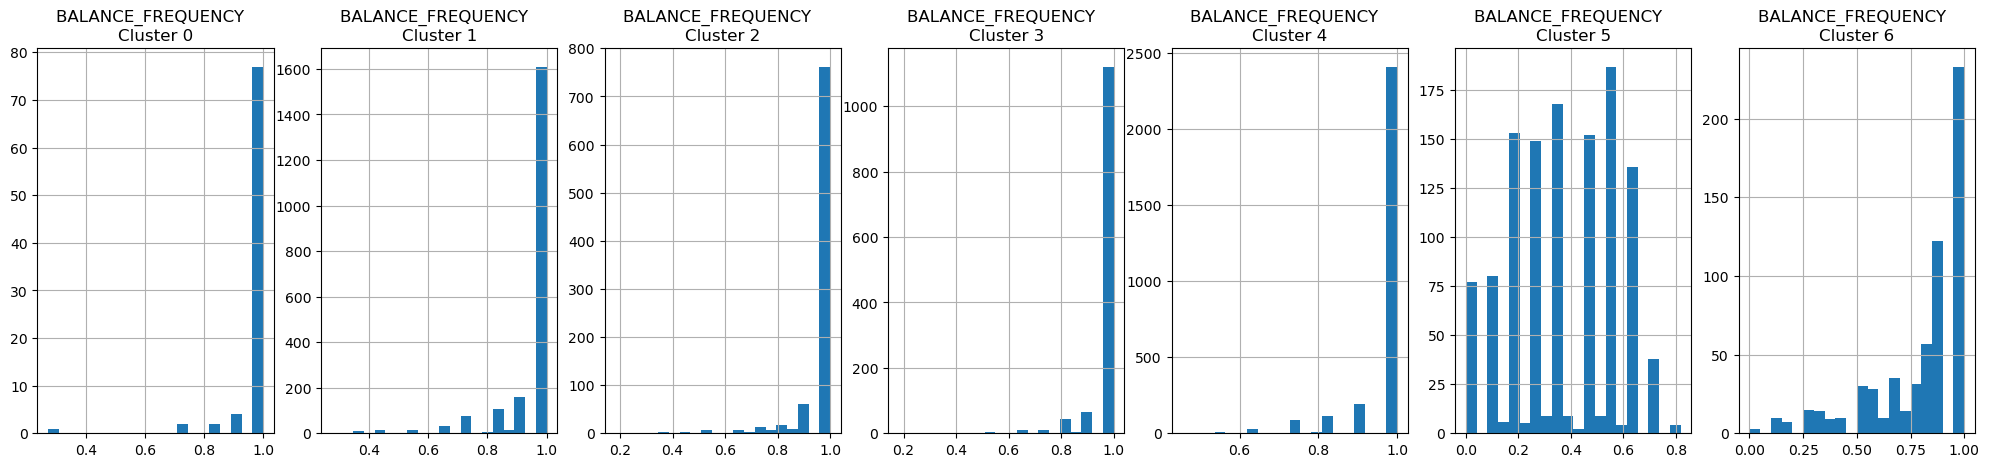

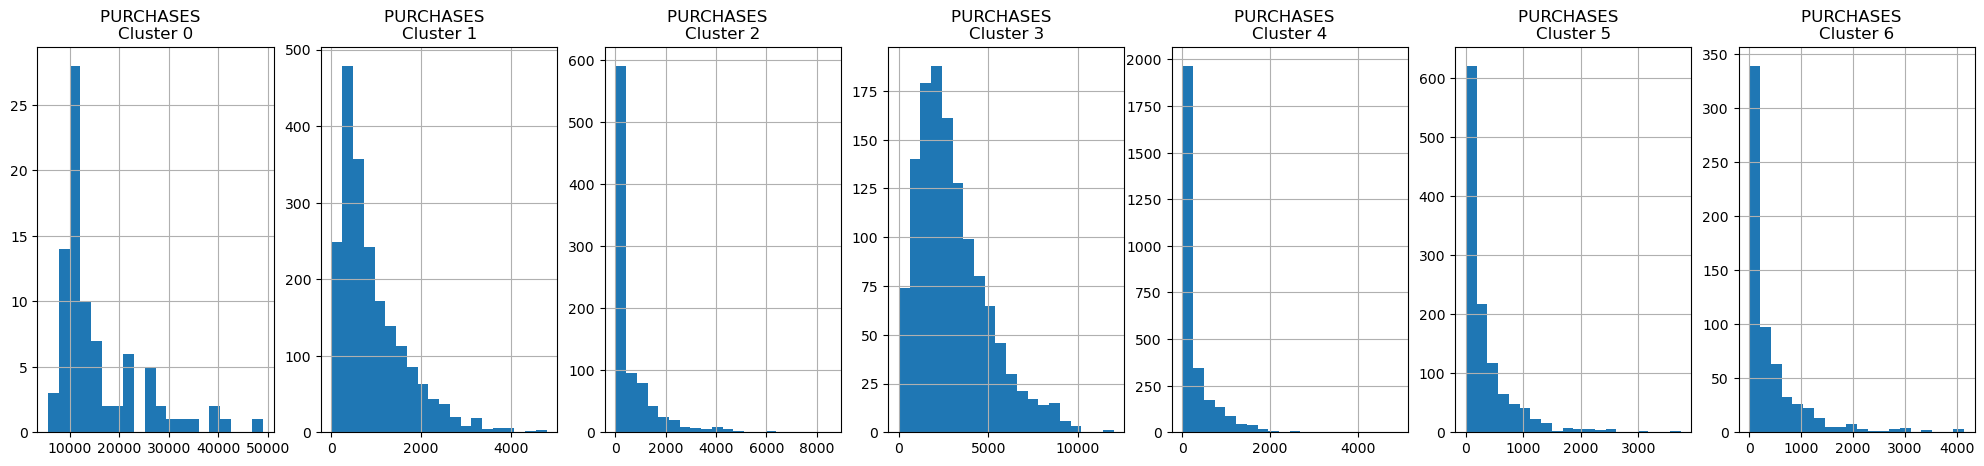

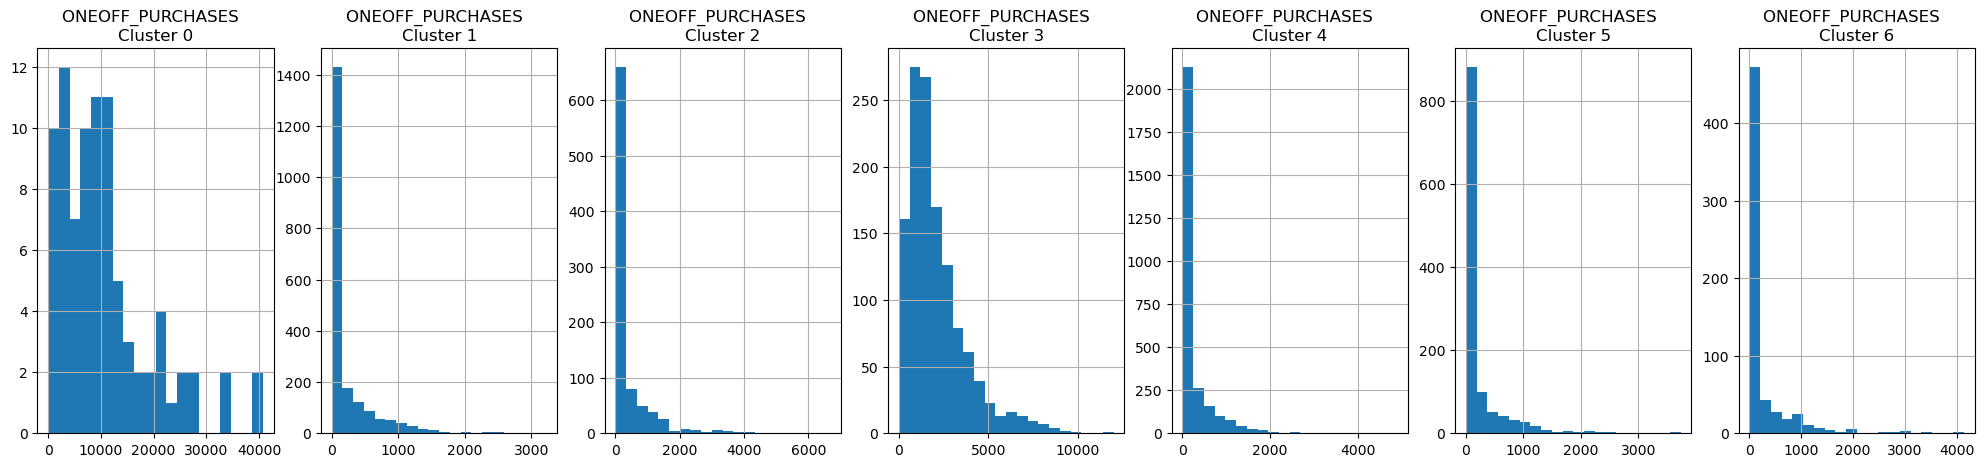

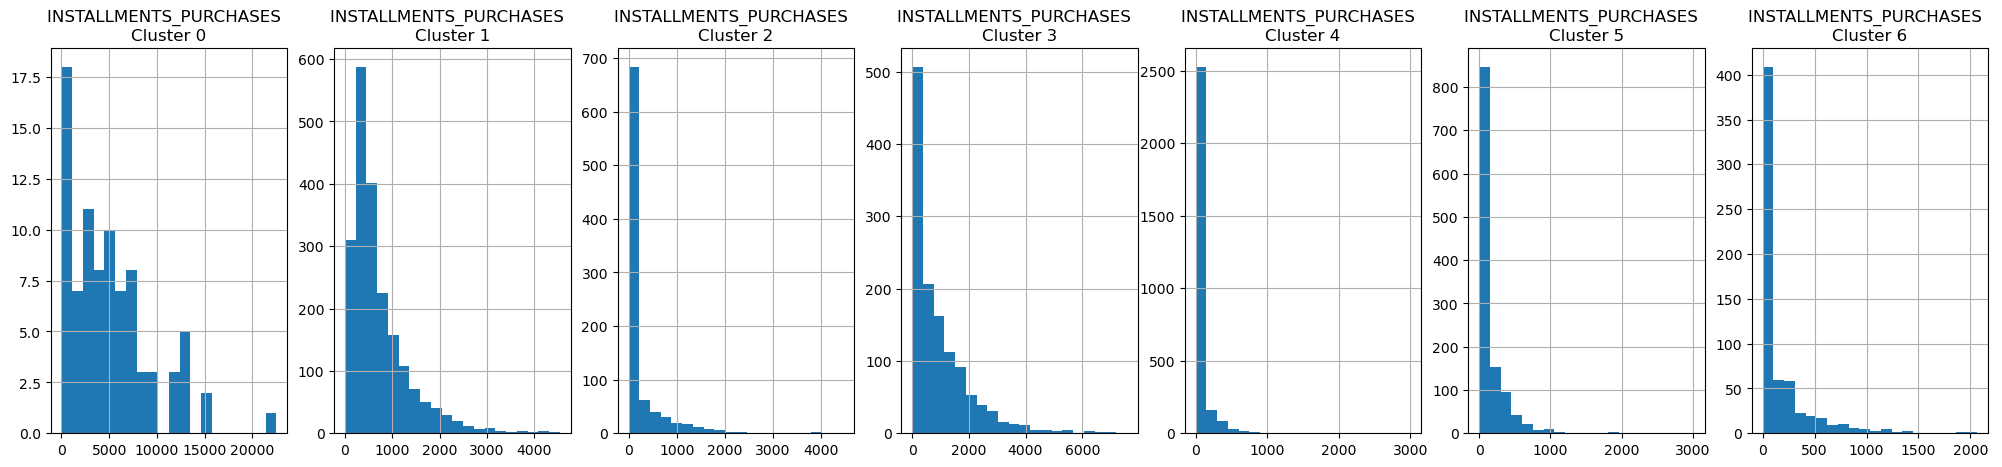

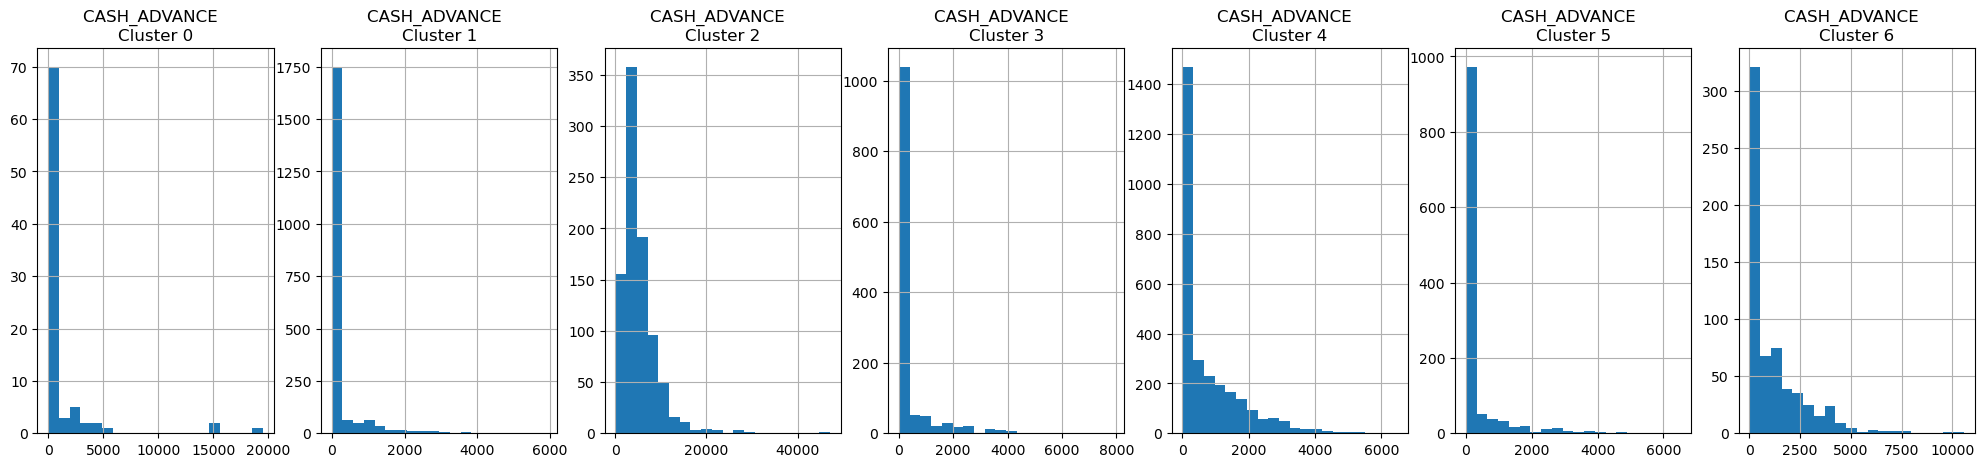

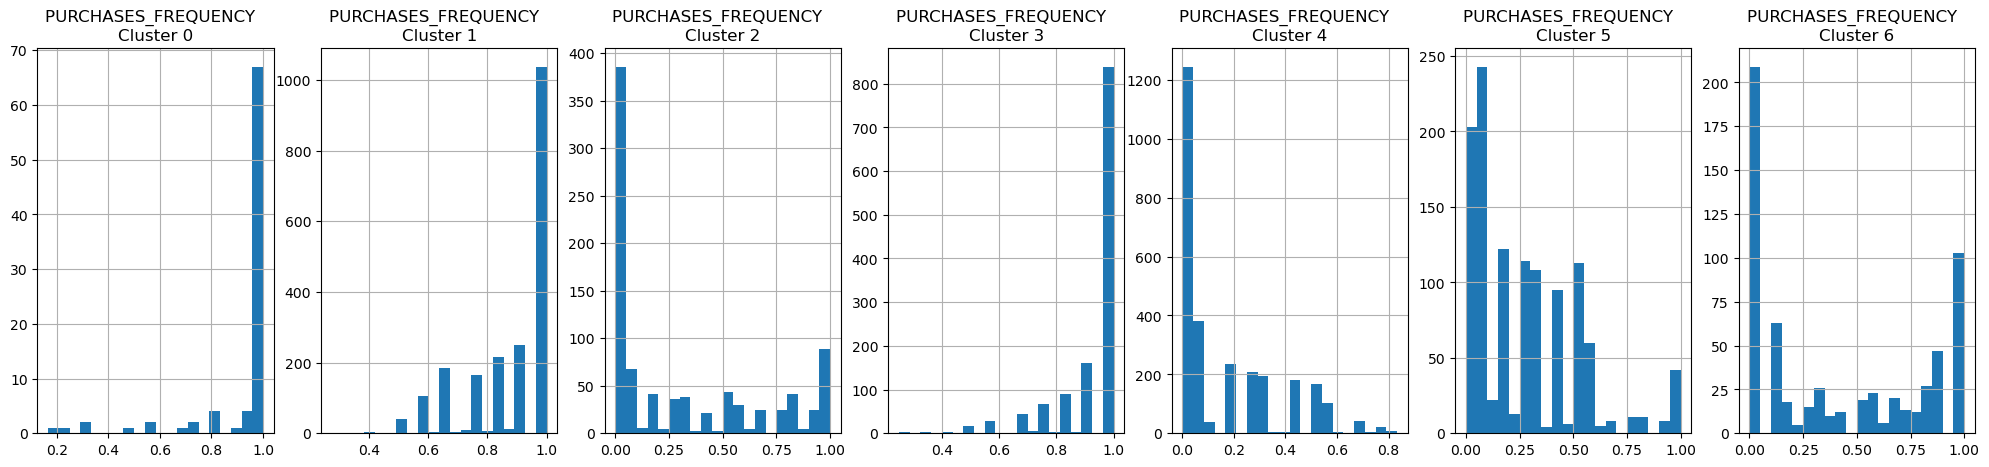

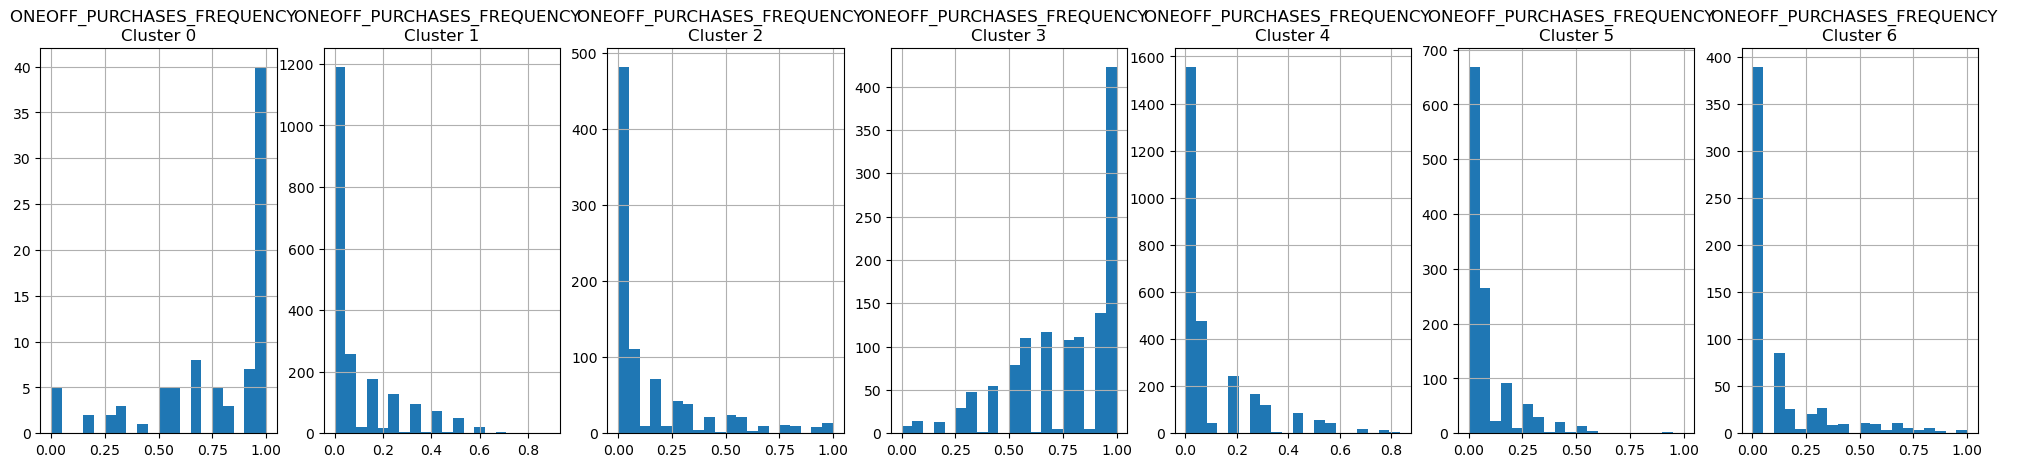

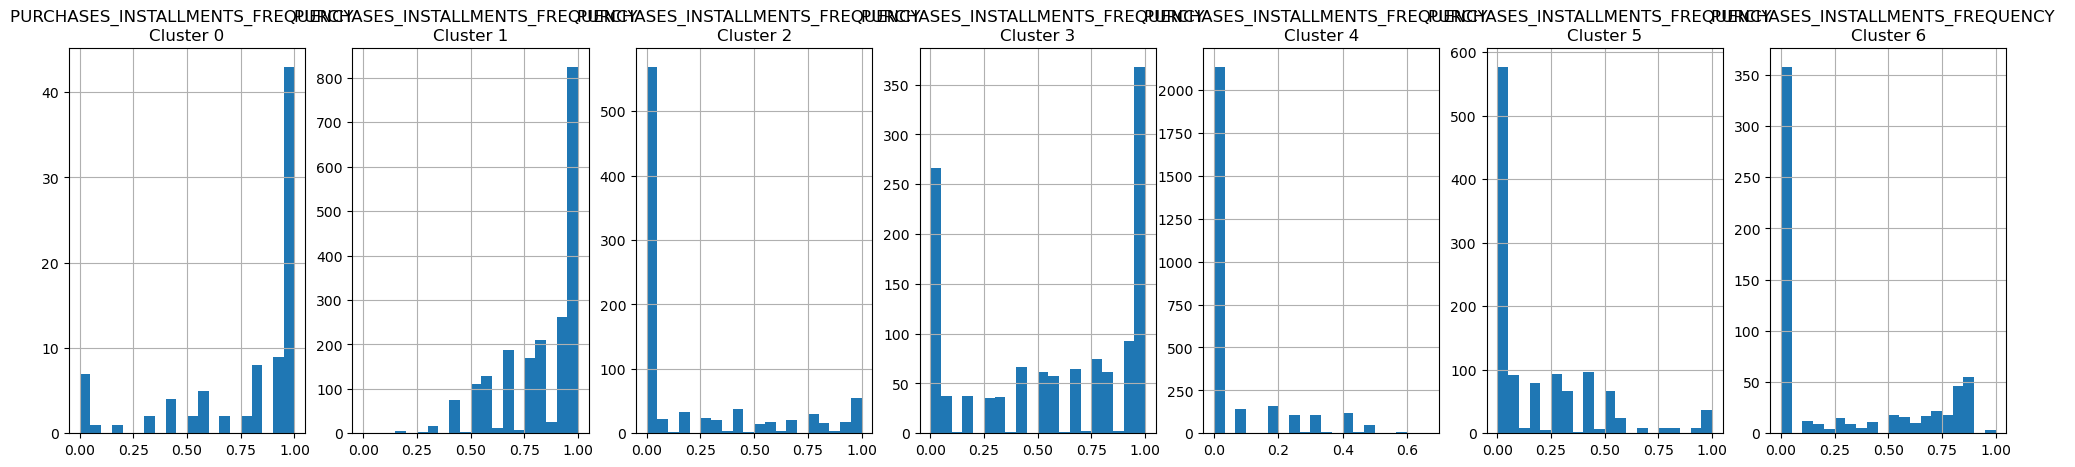

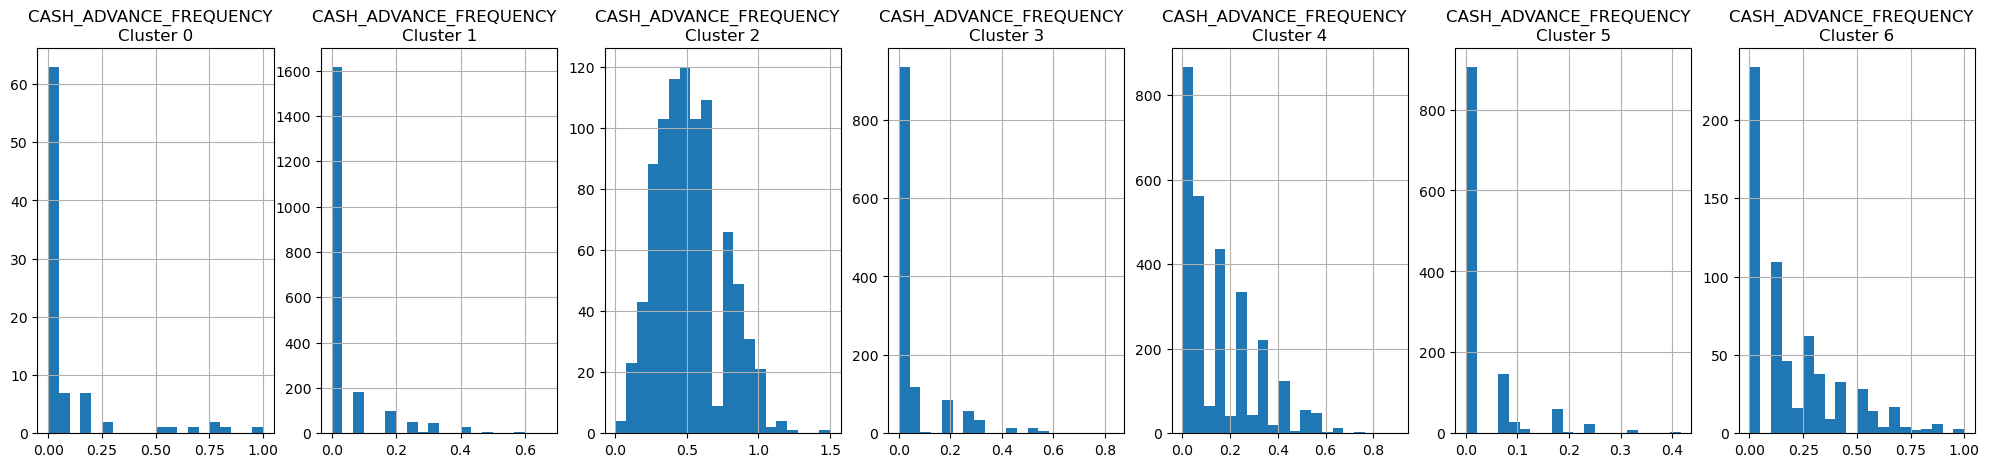

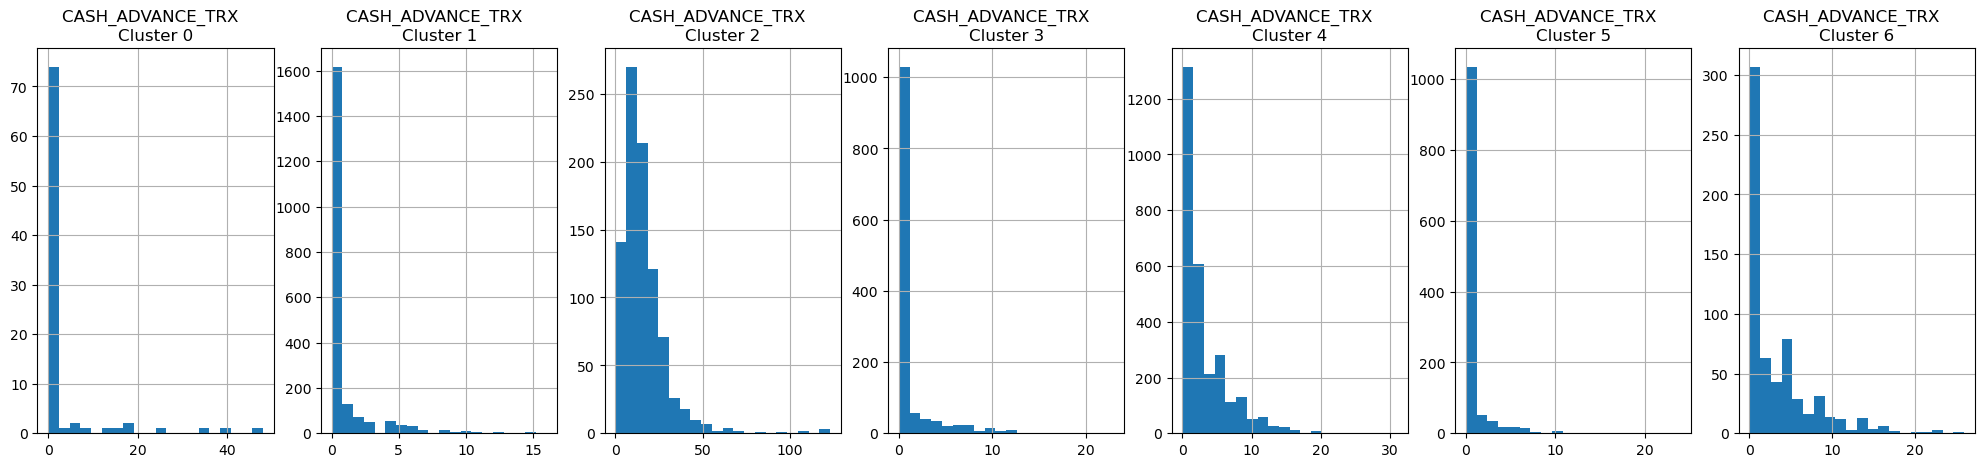

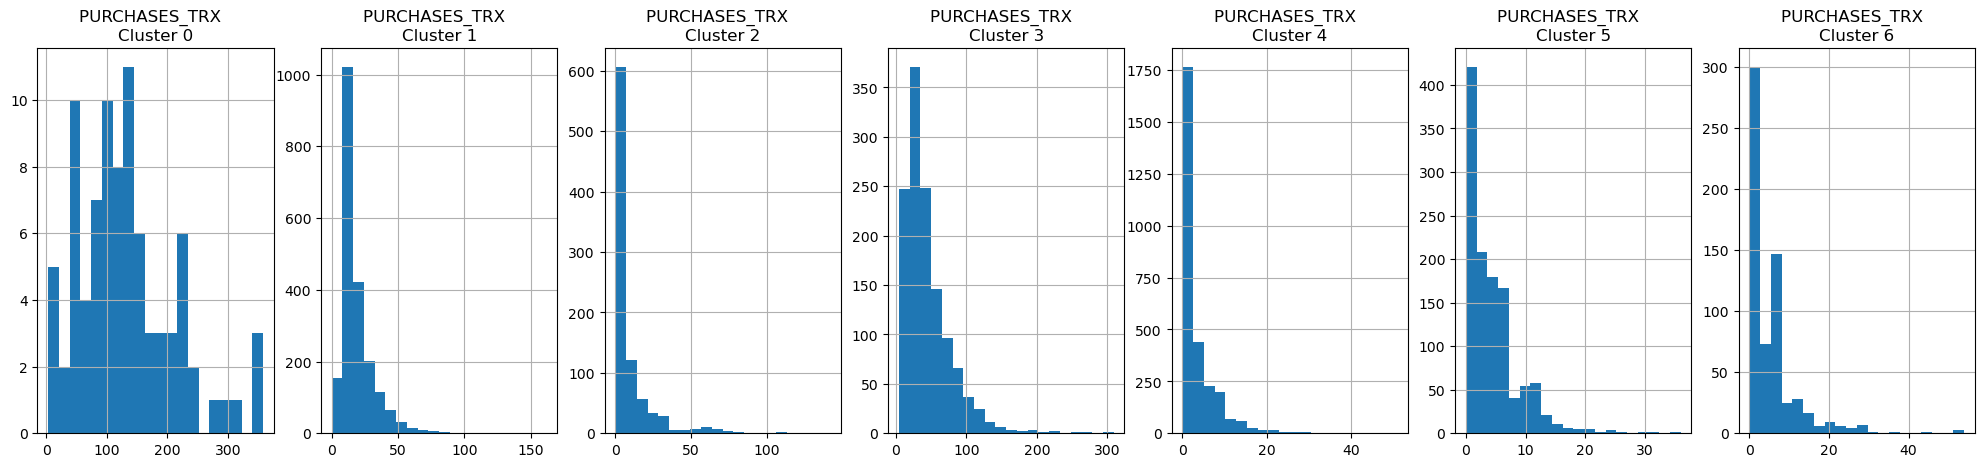

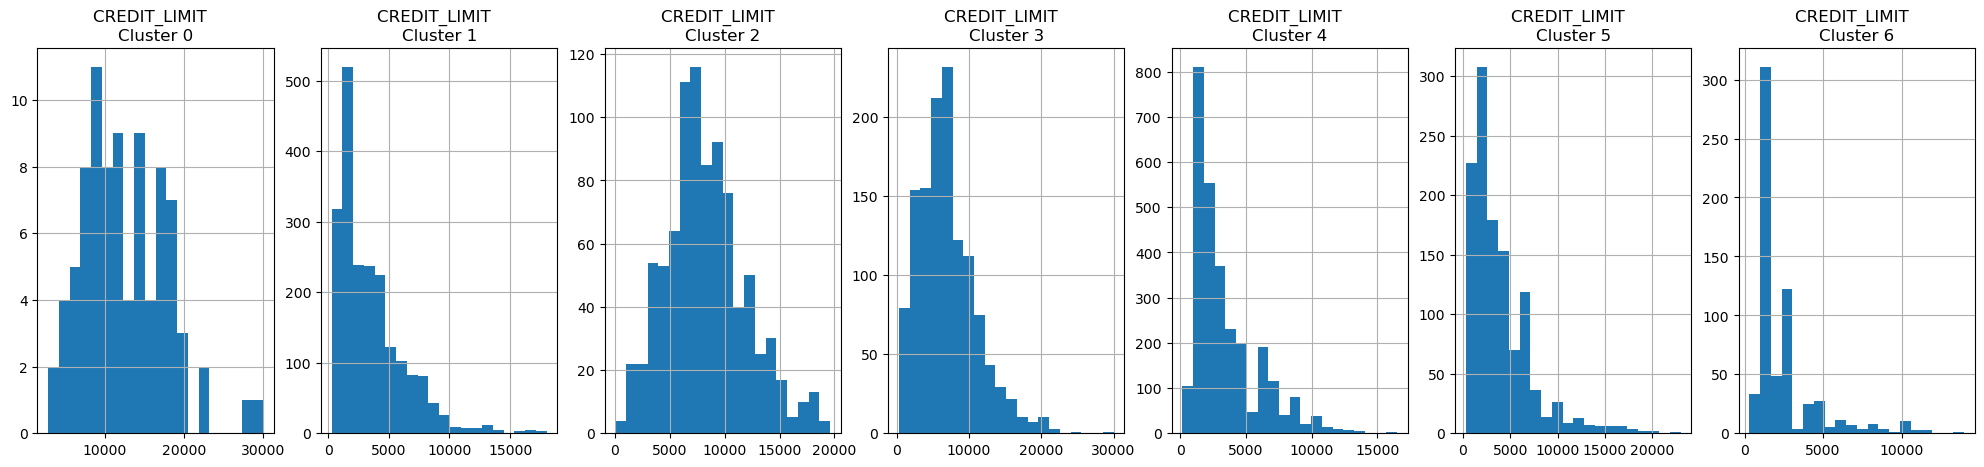

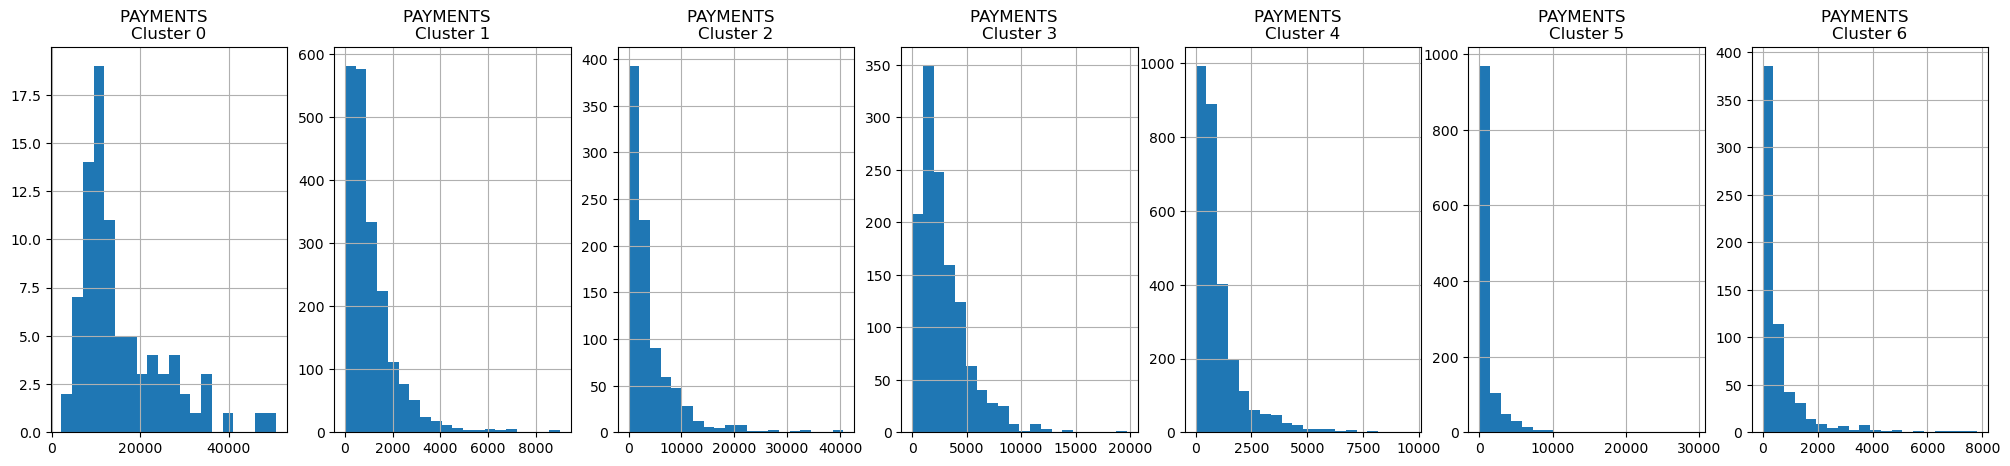

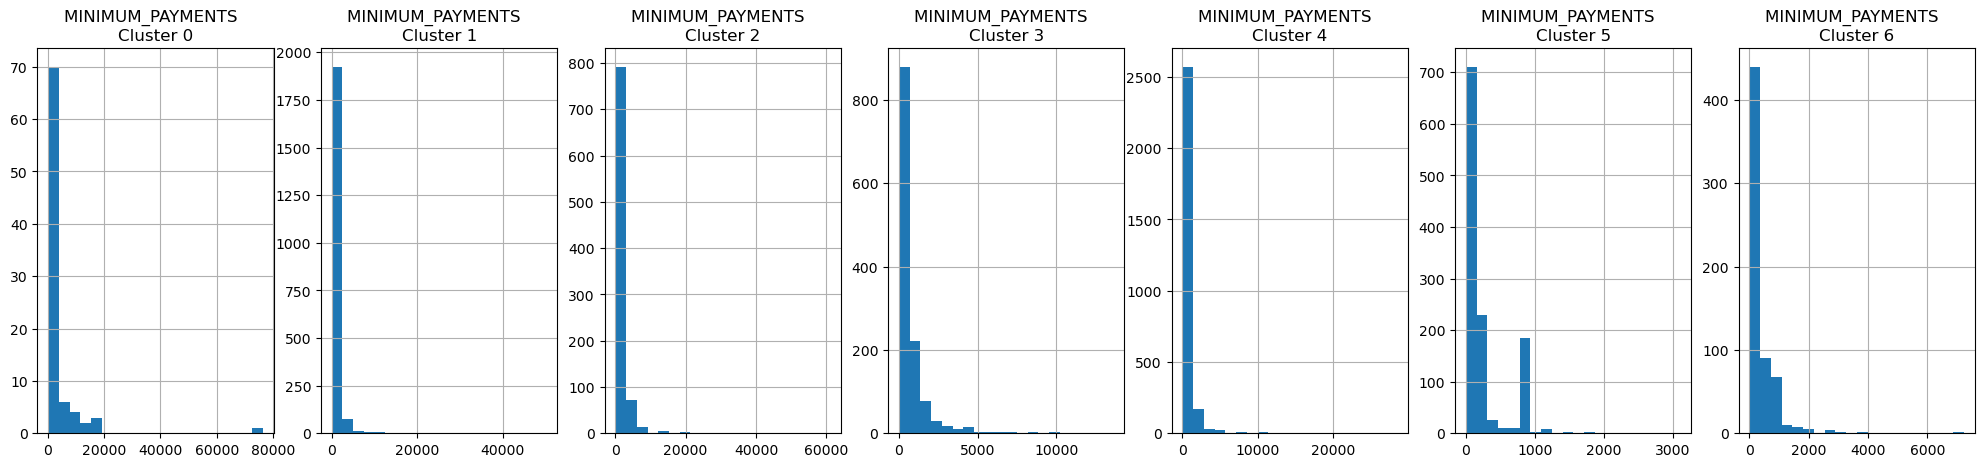

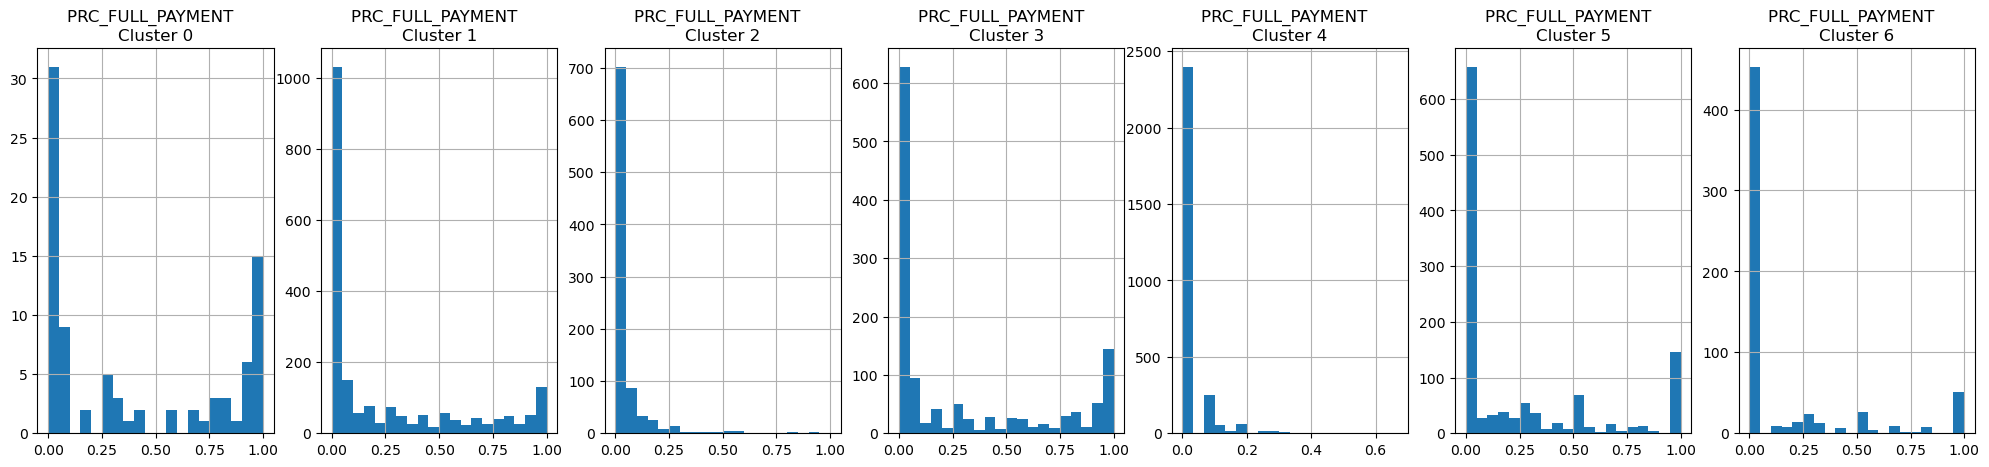

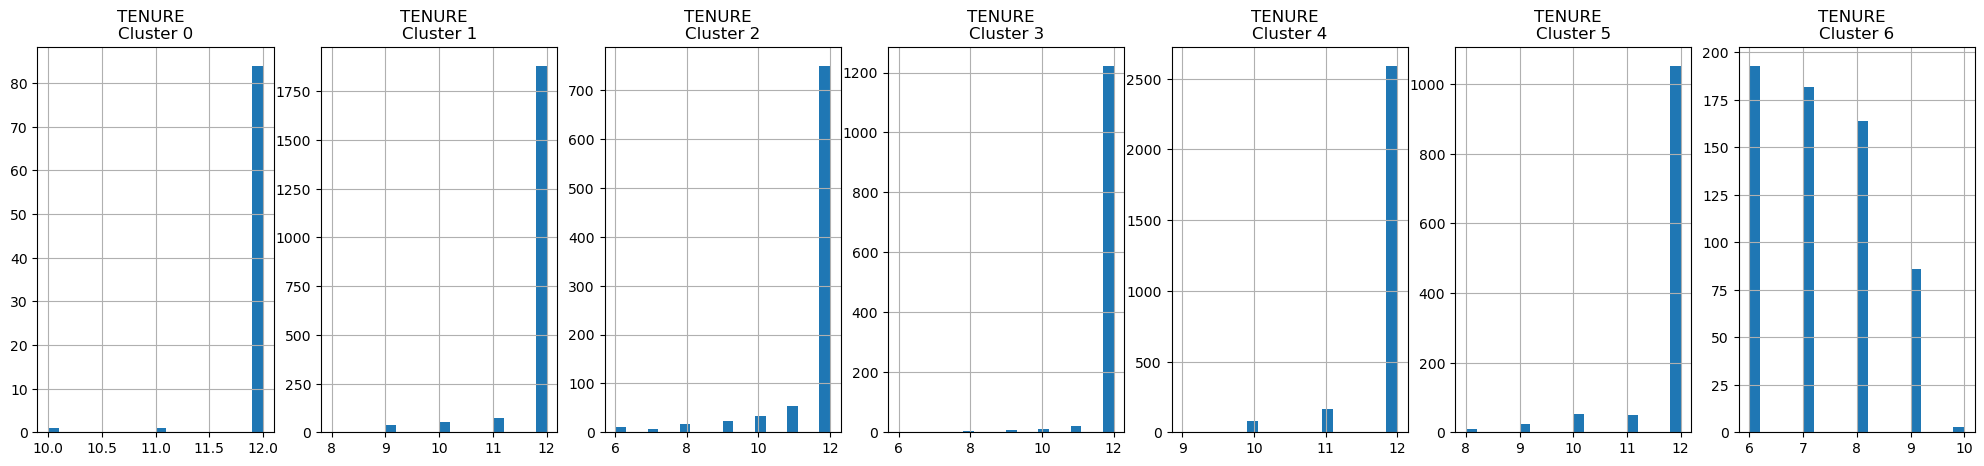

In [39]:
# 
for i in bank_df.columns:
    plt.figure(figsize=(25,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = bank_df_cluster[bank_df_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{}  \nCluster {}'.format(i,j))
    plt.show()

# Principal Component Analysis
<div class="alert alert-info">
* PCA is an unsupervised ML algorithm that performs dimensionality reductions while attempting to keep the original information unchanged. 
* PCA will try to find a new set of features called **components**, which are composites of the uncorrelated input features.
* For example, if 3 genes are represented in 3D with the green, magenta, blue and red points, it can be transformed into a 2-component system as PC1 and PC2 in a 2D space, while retaining all the data as green, magenta, blue, and red. 

<img src = 'PCA.png' width=600>

* I will take the scaled data and apply PCA to transform them into two components.</div>

In [30]:
pca = PCA(n_components=2)  # create object and specify number of components required
principal_component = pca.fit_transform(bank_df_scaled)
principal_component

array([[-1.68225597, -1.07630231],
       [-1.1381039 ,  2.50658588],
       [ 0.96973065, -0.38355905],
       ...,
       [-0.92638765, -1.8108498 ],
       [-2.33668693, -0.65797067],
       [-0.5565879 , -0.40064527]])

<div class="alert alert-info">I took all the features from the scaled dataframe and transformed them into 2 components.</div>

In [31]:
# Create a dataframe with the two components 
pca_df = pd.DataFrame(data = principal_component, columns=['PCA1', 'PCA2'])
pca_df.head()

,PCA1,PCA2
0,-1.682256,-1.076302
1,-1.138104,2.506586
2,0.969731,-0.383559
3,-0.873559,0.043234
4,-1.599441,-0.688422


In [33]:
# Concatenate the cluster labels to pca_df
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,PCA1,PCA2,cluster
0,-1.682256,-1.076302,4
1,-1.138104,2.506586,2
2,0.969731,-0.383559,3
3,-0.873559,0.043234,4
4,-1.599441,-0.688422,4
...,...,...,...
8945,-0.359815,-2.016219,6
8946,-0.564537,-1.639176,6
8947,-0.926388,-1.810850,6
8948,-2.336687,-0.657971,6


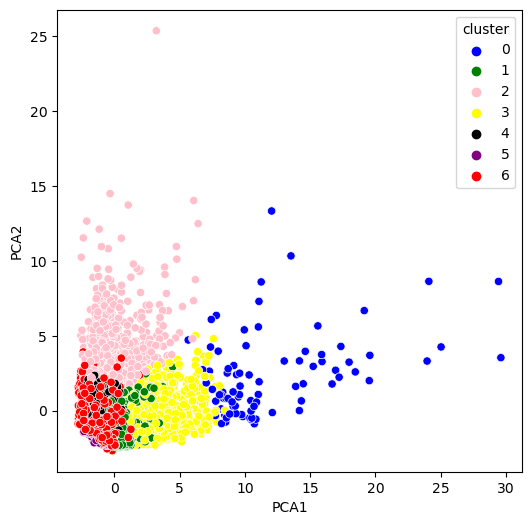

In [36]:
# Create a scatterplot to print PCA1 and PCA2
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=pca_df, palette=['blue', 'green', 'pink', 'yellow', 'black', 'purple', 'red'])
plt.show()

All the 7 clusters are represented in the Principal Component space. 
* Cluster 5 belongs to the Transactors
* Cluster 2 belongs to the Revolvers
* Cluster 0 belongs to the VIP Customers
* Cluster 6 belongs to the New Customers

<div class="alert alert-info">Using KMeans Clustering and PCA, I have performed Customer Market Segmentation for a bank database. This would in turn help the marketing team direct their campaigns to the right sectors.</div>

---

# The End